<a href="https://colab.research.google.com/github/masongrizchel/masongrizchel/blob/main/2025_03_02_AI_for_Beginners_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Python-Artificial-Intelligence-Projects-for-Beginners/refs/heads/master/Chapter01/dataset/student-por.csv', sep=';')
len(data)

649

In [2]:
# generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30

data['pass'] = data.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3'])>=30 else 0, axis=1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


In [3]:
# use one-hot encoding on categorical columns
data = pd.get_dummies(data, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [4]:
# shuffle rows
data = data.sample(frac=1)

# split training and testing data
data_train=data[:500]
data_test=data[500:]

data_train_att = data_train.drop('pass', axis=1)
data_train_pass = data_train['pass']


data_test_att = data_test.drop('pass', axis=1)
data_test_pass = data_test['pass']

data_att = data.drop(['pass'], axis=1)
data_pass = data['pass']

# number of students in whole dataset:
import numpy as np
print('Passing: %d out of %d (%.2f%%)' % (np.sum(data_pass), len(data_pass), 100*float(np.sum(data_pass)) / len(data_pass)))


Passing: 492 out of 649 (75.81%)


In [5]:
# fit a decision tree

from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,)
t = t.fit(data_train_att, data_train_pass)

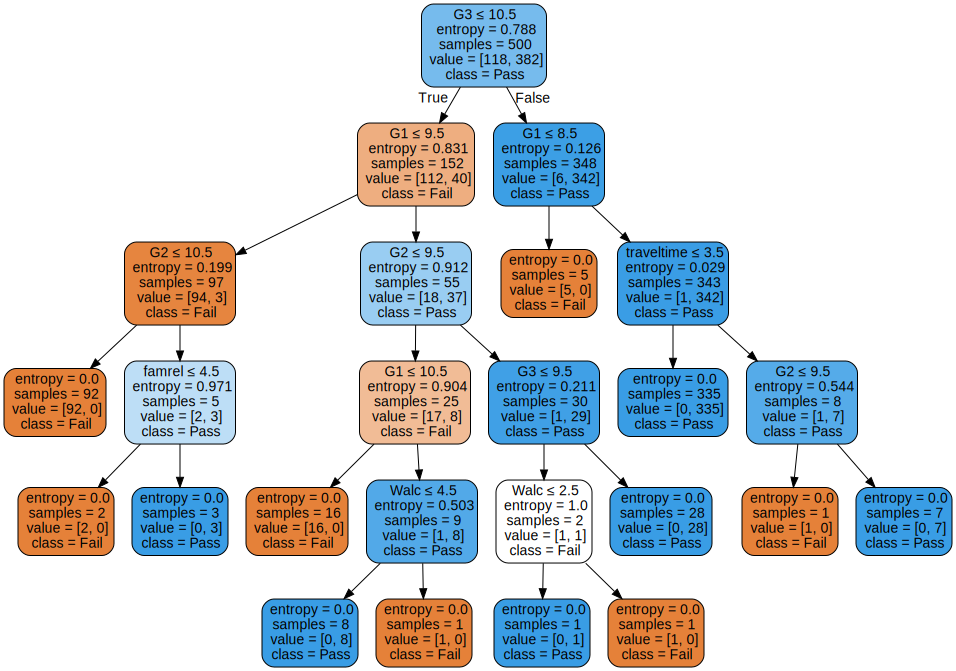

In [6]:
# visualize tree

import graphviz

dot_data = tree.export_graphviz(t, out_file=None,
                         feature_names=list(data_train_att),
                         class_names=['Fail', 'Pass'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [8]:
t.score(data_test_att, data_test_pass)

0.9932885906040269

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, data_att, data_pass, cv=5)

# show average score and +/- two standard deviations away
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)


In [12]:
for max_depth in range(1,20):
  t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  scores = cross_val_score(t, data_att, data_pass, cv=5)
  print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))


Max depth: 1, Accuracy: 0.91 (+/- 0.01)
Max depth: 2, Accuracy: 0.96 (+/- 0.02)
Max depth: 3, Accuracy: 0.98 (+/- 0.01)
Max depth: 4, Accuracy: 0.98 (+/- 0.02)
Max depth: 5, Accuracy: 0.99 (+/- 0.02)
Max depth: 6, Accuracy: 0.99 (+/- 0.02)
Max depth: 7, Accuracy: 0.99 (+/- 0.01)
Max depth: 8, Accuracy: 0.99 (+/- 0.02)
Max depth: 9, Accuracy: 0.98 (+/- 0.02)
Max depth: 10, Accuracy: 0.98 (+/- 0.02)
Max depth: 11, Accuracy: 0.98 (+/- 0.02)
Max depth: 12, Accuracy: 0.98 (+/- 0.03)
Max depth: 13, Accuracy: 0.98 (+/- 0.02)
Max depth: 14, Accuracy: 0.98 (+/- 0.03)
Max depth: 15, Accuracy: 0.98 (+/- 0.02)
Max depth: 16, Accuracy: 0.98 (+/- 0.02)
Max depth: 17, Accuracy: 0.98 (+/- 0.02)
Max depth: 18, Accuracy: 0.99 (+/- 0.01)
Max depth: 19, Accuracy: 0.98 (+/- 0.03)


In [13]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1,20):
  t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  depth_acc[i, 0] = max_depth
  depth_acc[i,1] = scores.mean()
  depth_acc[i,2] = scores.std() * 2
  i += 1

In [14]:
depth_acc

array([[ 1.        ,  0.97844961,  0.02817707],
       [ 2.        ,  0.97844961,  0.02817707],
       [ 3.        ,  0.97844961,  0.02817707],
       [ 4.        ,  0.97844961,  0.02817707],
       [ 5.        ,  0.97844961,  0.02817707],
       [ 6.        ,  0.97844961,  0.02817707],
       [ 7.        ,  0.97844961,  0.02817707],
       [ 8.        ,  0.97844961,  0.02817707],
       [ 9.        ,  0.97844961,  0.02817707],
       [10.        ,  0.97844961,  0.02817707],
       [11.        ,  0.97844961,  0.02817707],
       [12.        ,  0.97844961,  0.02817707],
       [13.        ,  0.97844961,  0.02817707],
       [14.        ,  0.97844961,  0.02817707],
       [15.        ,  0.97844961,  0.02817707],
       [16.        ,  0.97844961,  0.02817707],
       [17.        ,  0.97844961,  0.02817707],
       [18.        ,  0.97844961,  0.02817707],
       [19.        ,  0.97844961,  0.02817707]])

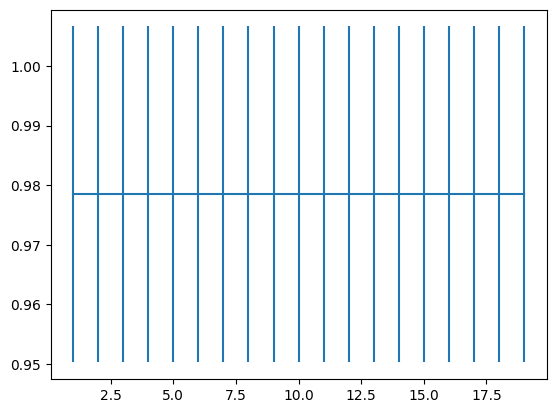

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()